In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Introduction

When we purchase something, we look into many features that tell us that the product we choose would be the best fit for what we are looking for. Most common features that we want to consider include the number of reviews, ratings, and price. To test if the features can tell us if the product is a good choice, I chose Sephora products dataset which contains products' name, price, the number of reviews and likes, etc. By analyzing the data with using multiple linear regression, I can determine which feature is most related to the product's rating and how well the multiple linear regression can predict the product's rating. Results from analysis of multiple linear regression on the dataset can tell us which feature we should consider more when choosing a product. Also, how well all of the features together accounts for the ratings can be discovered through the analysis of multiple linear regression on the dataset.

### Data 

"Sephora Skincare Products" dataset is from Kaggle and orginally created by Florencia Leoni. According to the documentation, the dataset was collected through scraping Sephora website. The dataset contains 16 seprate csv files. I have used 4 datasets:'treatments.csv', 'eyecare.csv', 'moisturizers.csv', and 'wellness.csv'. Each contains 10 columns: ['Unnamed: 0', 'brand', 'name', 'price', 'n_of_reviews', 'n_of_loves', 'review_score', 'size', 'clean_product', 'category']. Since all 4 datasets contain the same number of columns and datatypes in each column, I merged them into one dataframe. I picked the columns that can be possible factors for affecting the review score and have numerical values or can be converted to numerical values. The attributes that I chose are 'price', 'n_of_reviews', 'n_of_loves', 'size', and 'clean_product'. The datatypes of the columns before analyzing them are as follows: 'price' (object), 'n_of_reviews' (int64), 'n_of_loves' (int64), 'review_score' (float64), 'size' (object), 'clean_product' (int64),and 'category' (object). Before using the data to analyze, the columns 'price' and 'size' are strings, so I converted them to floats. Also, all None values are replaced with 0.

In [2]:
# there are 4 different types of products in total
# treatments, eyecare, moisturizers, and wellness
# read all those files and merge them into one dataframe

# treatment products
treatments_df = pd.read_csv ('treatments.csv')

# eyecare products
eyecare_df = pd.read_csv('eyecare.csv')

# moisturizers products
moisturizers_df = pd.read_csv('moisturizers.csv')

# wellness products
wellness_df = pd.read_csv('wellness.csv')

# Merge into one dataframe
merged_df = pd.concat([treatments_df, eyecare_df, moisturizers_df, wellness_df], ignore_index=True, axis=0)

# Conert "None" to 0 in 'size' column
merged_df['size'] = merged_df['size'].replace(to_replace="None", value= 0)


def size_to_float(df):
    """ eliminate "oz" in the values and 
    returns a list of values that are numerical but in string """
    updated_size = []
    df_null = df.str.split().isnull().to_list()
    for i in range(len(df.index)):
        if df_null[i] == True:
            updated_size += [0]
        elif "oz" in df[i].split()[0]:
            updated_size += [[df[i].split()[0]][0][:-2]]      
        else:
            updated_size += [df[i].split()[0]]
    return updated_size

def price_to_float(df):
    """ eliminate the information embraced with "()" in the values and 
    returns a list of values that that are numerical but in string """
    price_list = df.to_list()
    for i in range(len(df.index)):
        if '(' in str(df[i]):
            index = str(df[i]).index('(')
            price_list[i] = str(df[i])[:index]
    return price_list

# Replace the original 'size' column values to newly generated column values
merged_df['size'] = size_to_float(merged_df['size'])
# Convert the column 'size' datatype to float
merged_df['size'] = merged_df['size'].astype(float)

# Replace the original 'price' column values to newly generated column values
merged_df['price'] = price_to_float(merged_df['price'])
# Convert the column 'price' datatype to float
merged_df['price'] = merged_df['price'].astype(float)

print(merged_df.head())

   Unnamed: 0           brand                                           name  \
0           0         Clarins  Double Serum Complete Age Control Concentrate   
1           1  Drunk Elephant                    C-Firma Vitamin C Day Serum   
2           2  Drunk Elephant                     TLC Sukari Babyfacial Mask   
3           3  Drunk Elephant          T.L.C. Framboos™ Glycolic Night Serum   
4           4    SUNDAY RILEY    Good Genes All-In-One Lactic Acid Treatment   

   price  n_of_reviews  n_of_loves  review_score  size  clean_product  \
0   89.0           391       16293        4.0997  1.00              0   
1   80.0          1000      135964        4.1097  1.00              1   
2   80.0          1000      178783        4.4283  1.69              1   
3   90.0          1000      144421        4.2968  1.00              1   
4  158.0          2000      154923        4.3046  1.70              0   

      category  
0  Face Serums  
1  Face Serums  
2   Face Masks  
3  Face Seru


### Methodology

To analyze the dataset, I used multiple linear regression. Multiple linear regression is constructing an equation that best describes the relationships among multiple variables and how well the equation describes the relationship between the variables by measuring the error between the model and the actuald data. This particular method is used because it is appropriate method to analyze more than one variable. I performed multiple lienar regression multiple times with different attributes. After performing multiple linear regression on all the attributes, I performed it on each attribute. Then, I calculated the mean squared error to decide which model predicts the rating the best.

### Analysis 

In [3]:

# Select the features
X = merged_df[['price', 'n_of_reviews', 'n_of_loves', 'size', 'clean_product']].values
# Select the target feature
Y = merged_df['review_score'].values


# Multiple linear regression on all of the faetures selected

# Make a matrix with ones in the first column and other columns after that
ones = np.ones((len(X),), dtype=int)
design_df = merged_df[['price', 'n_of_reviews', 'n_of_loves', 'size', 'clean_product']]
design_df.insert(0, "Ones", ones, allow_duplicates=True)
design_mat = design_df.values
# beta_hat contains regression coefficients
beta_hat = np.linalg.inv(design_mat.T @ design_mat) @ design_mat.T @ Y
# y_hat contains the results from the regression equations based on the inputs
y_hat = design_mat @ beta_hat

def linreg(col):
    ones = np.ones((len(X),), dtype=int)
    vals = merged_df[col].values
    mat = np.vstack((ones, vals)).T
    b_hat = np.linalg.inv(mat.T @ mat) @ (mat.T @ Y)
    y_hat = b_hat[1] * vals + b_hat[0]
    return y_hat

# Linear regression on 'price'
price_y_hat = linreg('price')

# Linear regression on 'n_of_reviews'
reviews_y_hat = linreg('n_of_reviews')

# Linear regression on 'n_of_loves'
loves_y_hat = linreg('n_of_loves')

# Linear regression on 'size'
size_y_hat = linreg('size')

# Linear regression on 'clean product'
clean_y_hat = linreg('clean_product')

regcoef = pd.DataFrame(np.array([beta_hat]),
                   columns=['Intercept', 
                   'price per one point of review score', 
                   'number of reviews per one point of review score',
                   'number of loves per one point of review score', 
                   'size per one point of review score',
                   'clean product per one point of review score'])
print(regcoef)

   Intercept  price per one point of review score  \
0   3.857495                             0.001013   

   number of reviews per one point of review score  \
0                                         0.000104   

   number of loves per one point of review score  \
0                                       0.000002   

   size per one point of review score  \
0                            0.027904   

   clean product per one point of review score  
0                                     0.105733  


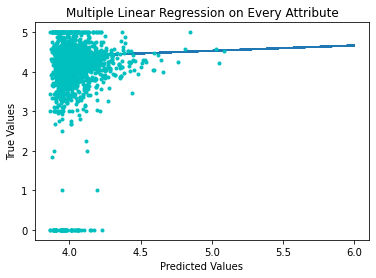

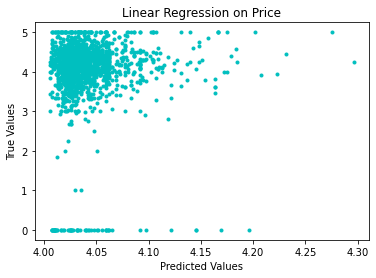

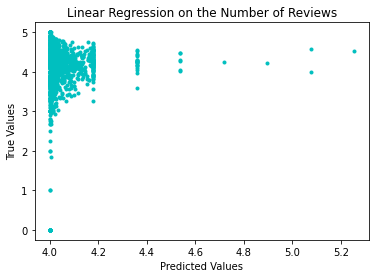

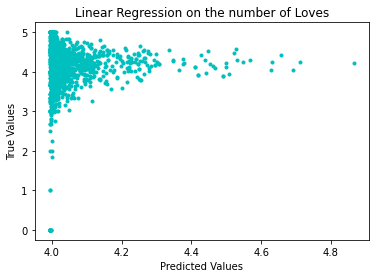

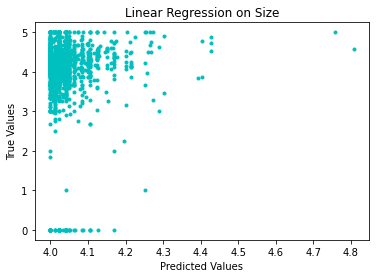

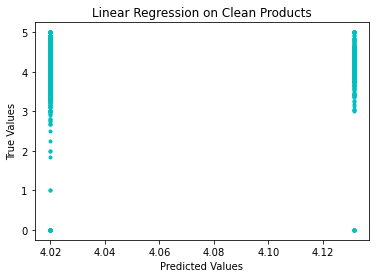

In [4]:
# Multiple linear regression line
x = np.random.randint(4, 7, 100)
y = x * beta_hat[1] + x * beta_hat[2] + x * beta_hat[3] + x * beta_hat[4] + x * beta_hat[5] + beta_hat[0]
plt.plot(x, y)

# Scatterplot of predicted values vs. true values
plt.plot(y_hat, Y, '.c')
plt.title("Multiple Linear Regression on Every Attribute")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

plt.plot(price_y_hat, Y, '.c')
plt.title("Linear Regression on Price")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

plt.plot(reviews_y_hat, Y, '.c')
plt.title("Linear Regression on the Number of Reviews")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

plt.plot(loves_y_hat, Y, '.c')
plt.title("Linear Regression on the number of Loves")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

plt.plot(size_y_hat, Y, '.c')
plt.title("Linear Regression on Size")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

plt.plot(clean_y_hat, Y, '.c')
plt.title("Linear Regression on Clean Products")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [8]:
# Calculating the mean squared error
def calc_mse(Y, y_hat):
    """ Calculate and return the mean squared error """
    return np.square(np.subtract(Y, y_hat)).mean()

mse_1 = calc_mse(Y, y_hat)
print("For multiple linear regression on every attribute, MSE is", mse_1)

mse_2 = calc_mse(Y,price_y_hat)
print("For linear regression on price, MSE is", mse_2)

mse_3 = calc_mse(Y,reviews_y_hat)
print("For linear regression on the number of reviews, MSE is", mse_3)

mse_4 = calc_mse(Y,loves_y_hat)
print("For linear regression on the number of loves, MSE is", mse_4)

mse_5 = calc_mse(Y,size_y_hat)
print("For linear regression on size, MSE is", mse_5)

mse_6 = calc_mse(Y,clean_y_hat)
print("For linear regression on clean products, MSE is", mse_6)

mse_lst = [mse_1, mse_2, mse_3, mse_4, mse_5, mse_6]
print("The smallest MSE is", min(mse_lst))


For multiple linear regression on every attribute, MSE is 0.7590746434422855
For linear regression on price, MSE is 0.7733777722876911
For linear regression on the number of reviews, MSE is 0.7672809258493343
For linear regression on the number of loves, MSE is 0.7669724419895692
For linear regression on size, MSE is 0.7712357581621249
For linear regression on clean products, MSE is 0.7723238282998859
The smallest MSE is 0.7590746434422855


In [9]:
# R-squared 
# formula: 1 - (Sum Squared Regression)/(Total Sum of Squares)
R_2 = 1 - ((np.sum(np.subtract(Y,y_hat)**2)) / np.sum(np.subtract(Y, np.mean(Y))**2))
print(R_2)

0.019534907359468168


### Results 

First, the table shows the regression coefficients and the intercept of the multiple linear regression model. The clean product has the greatest regression coefficient. After that, I have visualized the scatter plot with predicted values by the multiple linear regression model on the x-axis and the true values on y-axis. On the same figure, I added the line of the multiple linear regression. As shown above, the line does not seem to predict the actual values well. I have visualized scatter plot for the linear regression of each attribute. To compare which linear regression model predicts the actual value the best, I calcualted the mean squared error for each case. According to the calculation, the multiple linear regression line fits the data the best with the smallest MSE, around 0.759. Since there is no big difference among MSE values of the multiple linear regression model and the other linear regression models, I also calculated if the correlation coefficient, R-squared. R-squared is 0.0195 which is close to 0, meaning there is very weak correlation.

### Conclusion 

To predict the review score, I used 5 attributes: price, the number of reviews, the number of loves, size, and clean product. With 5 attributes, I used multiple linear regression to build a model that predicts the review score. The model was $y =  0.001013 x_1 + 0.000104 x_2 + 0.000002 x_3 + 0.027904 x_4 + 0.105733 x_5 + 3.857495$. I calculated the mean squared error for the multiple linear regression model and linear regression models for each attribute to compare. The multiple linear regression model had the mean square error of 0.759075. It was the smallest compared to linear regression models for a single attribute. As a result, performing linear regression on all 5 attributes together had a better model for predicting the value than linear regression on a single attribute. To determine if there is correlation between 5 attributes and the review score, I calculated R-squared. The R-squared was 0.019535, which was very close to 0. Thus, there was very weak correlation between 5 attributes and the review score. To conclude, it is hard to predict the review score accurately with using 5 attributes since there is no strong correlation between 5 attributes and the review score.

### References

"Sephora Skincare Products". Kaggle, https://www.kaggle.com/datasets/thedevastator/skincare-products-that-perform-the-best-at-sepho?select=wellness.csv
<br>
"Coefficient of Determination, R-squared". https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy)2.-,R%202%20%3D%201%20%E2%88%92%20sum%20squared%20regression%20(SSR)%20total,from%20the%20mean%20all%20squared.
<br>
For the codes for multiple linear regression, I referenced to the lecture 14 slides and my answers for HW 7.